# Sushil Khanal  
## Course: ABDM 
### Lab 6: Association Rule Mining with Apriori and FP-Growth

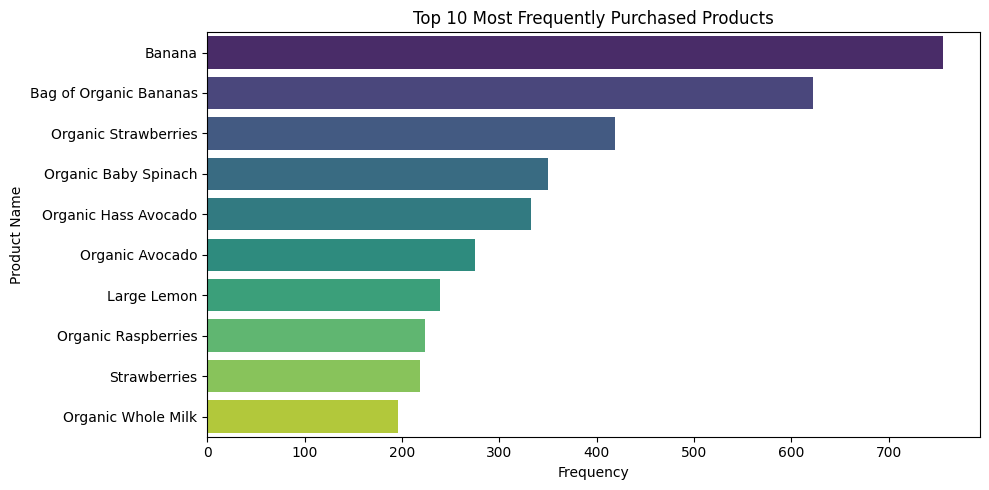

In [28]:
# Step 1: Data Preparation (Minimal Demo Version)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load a small sample 
order_products_prior = pd.read_csv(
    'order_products__prior.csv',
    usecols=['order_id', 'product_id'],
    nrows=100000
)

# Load only required columns from products 
products = pd.read_csv('products.csv', usecols=['product_id', 'product_name'])

# Load and filter 'orders' to only 'prior' and necessary columns
orders = pd.read_csv('orders.csv', usecols=['order_id', 'eval_set'])
orders = orders[orders['eval_set'] == 'prior']

# Merge datasets
merged_df = pd.merge(order_products_prior, orders, on='order_id')
merged_df = pd.merge(merged_df, products, on='product_id')

# Group into baskets
basket_df = merged_df.groupby('order_id')['product_name'].apply(list)
basket_sample = basket_df.head(5000).tolist() 

# Encode transaction data
te = TransactionEncoder()
te_ary = te.fit(basket_sample).transform(basket_sample)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Visualize most frequent products
item_counts = df_encoded.sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=item_counts.values, y=item_counts.index, palette='viridis')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Frequency')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


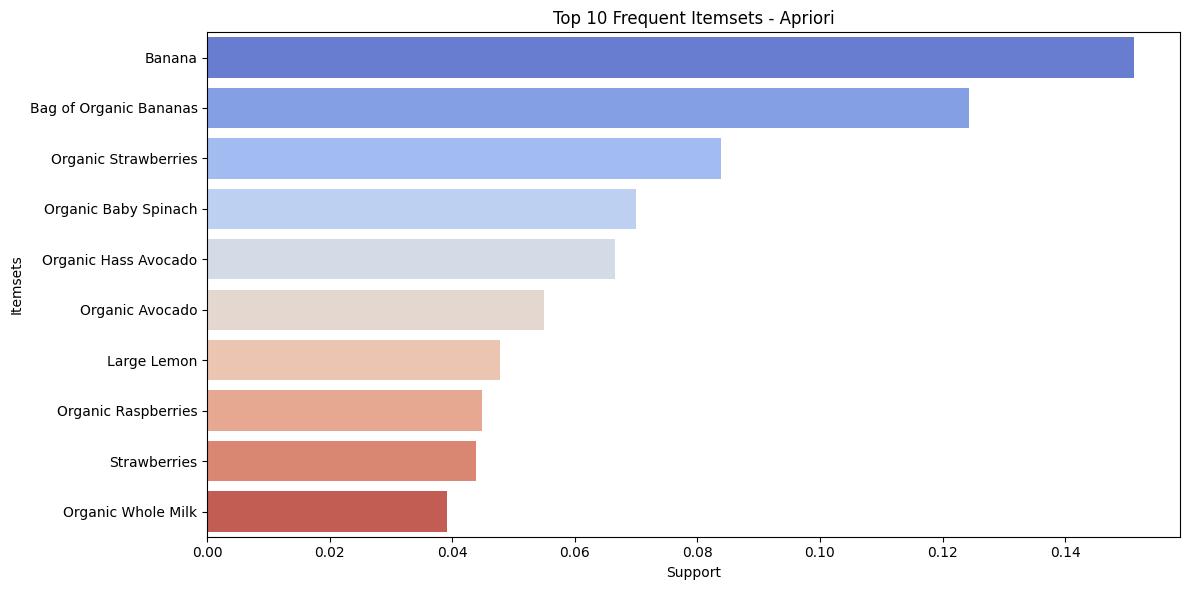

In [29]:
# Step 2: Apriori Algorithm

# Run Apriori
frequent_items_ap = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_items_ap = frequent_items_ap.sort_values(by='support', ascending=False)

# Convert itemsets to string for readability
frequent_items_ap['itemsets_str'] = frequent_items_ap['itemsets'].apply(lambda x: ', '.join(list(x)))

# Plot Top 10 frequent itemsets
plt.figure(figsize=(12, 6))
sns.barplot(
    data=frequent_items_ap.head(10),
    x='support',
    y='itemsets_str',
    palette='coolwarm'
)
plt.title('Top 10 Frequent Itemsets - Apriori')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Apriori frequent itemsets: 124
FP-Growth frequent itemsets: 362


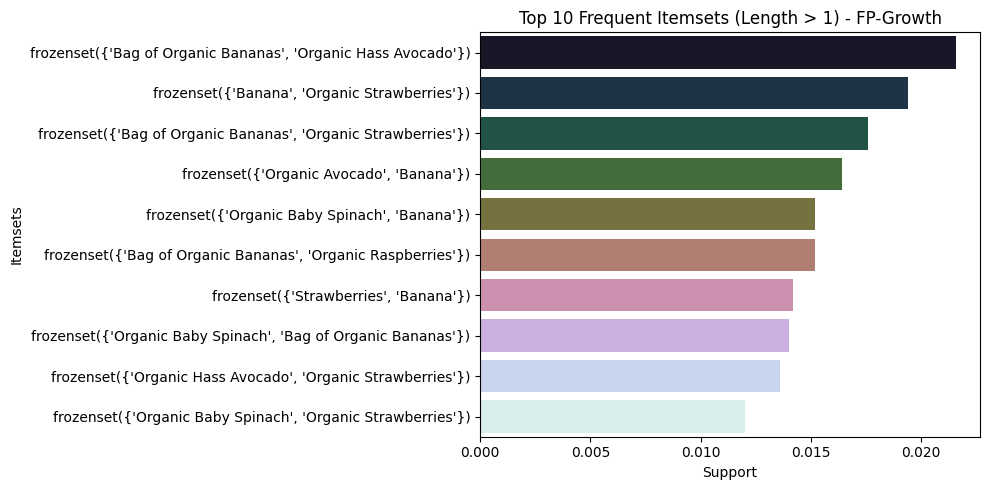

In [34]:
# Step 3: FP-Growth Algorithm

# Run FP-Growth
frequent_items_fp = fpgrowth(df_encoded, min_support=0.005, use_colnames=True)
frequent_items_fp = frequent_items_fp.sort_values(by='support', ascending=False)

# Compare Apriori vs FP-Growth
print("Apriori frequent itemsets:", len(frequent_items_ap))
print("FP-Growth frequent itemsets:", len(frequent_items_fp))

# Visualize top FP-Growth itemsets
# Filter for itemsets with more than 1 item
frequent_items_fp_sets = frequent_items_fp[frequent_items_fp['itemsets'].apply(lambda x: len(x) > 1)]

# Take top 10 by support
top10_sets_fp = frequent_items_fp_sets.head(10).copy()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top10_sets_fp, x='support', y=top10_sets_fp['itemsets'].astype(str), palette='cubehelix')
plt.title('Top 10 Frequent Itemsets (Length > 1) - FP-Growth')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()


Top 5 Apriori Rules:


,antecedents,consequents,support,confidence,lift


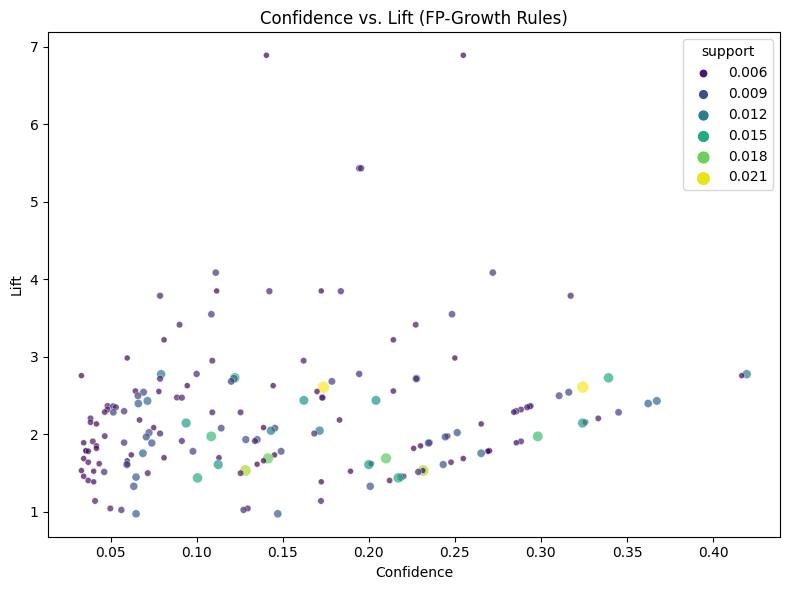

In [31]:
# Step 4: Association Rules & Analysis

# Generate rules from Apriori
rules_fp = association_rules(frequent_items_fp, metric="confidence", min_threshold=0.01)
rules_ap = rules_ap.sort_values(by='lift', ascending=False)

# Generate rules from FP-Growth
rules_fp = association_rules(frequent_items_fp, metric="confidence", min_threshold=0.03)
rules_fp = rules_fp.sort_values(by='lift', ascending=False)

# Display top 5 rules (Apriori)
print("Top 5 Apriori Rules:")
display(rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Scatter plot of confidence vs lift (FP-Growth)
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules_fp, x='confidence', y='lift', hue='support', size='support', palette='viridis', alpha=0.7)
plt.title('Confidence vs. Lift (FP-Growth Rules)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.tight_layout()
plt.show()


In [32]:
# Optional: Save rules or frequent itemsets to CSV
rules_ap.to_csv('apriori_rules.csv', index=False)
rules_fp.to_csv('fp_growth_rules.csv', index=False)
